In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
import random
import math

# libreria locale
import my_lib_modificata as my

In [50]:
# FAR FUNZIONARE IL FIT
# variabili da associare alla funzione fit
# m, sigma_m, c, sigma_c, cov_mc, rho_mc = my.lin_fit...
# cose da inserire dentro la funzione fit
# array x, array y, sigma_y, xlabel, ylabel, xmin, xmax, ymin, ymax, plot=True

In [51]:
# X, SIGMA_X, Y, SIGMA_Y
dT = np.genfromtxt('fit.txt', skip_header=True, usecols=0, delimiter=',')
sigma_dT = np.genfromtxt('fit.txt', skip_header=True, usecols=3, delimiter=',')
x = np.genfromtxt('fit.txt', skip_header=True, usecols=1, delimiter=',')
sigma_x = np.genfromtxt('fit.txt', skip_header=True, usecols=2, delimiter=',')
dT, sigma_dT, x, sigma_x

(array([0.0029582, 0.0035444, 0.0041228, 0.0046979, 0.0052634, 0.0058362,
        0.0064281, 0.0069988, 0.0075599, 0.0081505]),
 array([3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07, 3.e-07,
        3.e-07, 3.e-07]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4]),
 array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001]))

In [52]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (x.max()-x.min())/(dT.max()-dT.min())
m0

# STIMA DI M CON FIT PER SIGMA_L = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(dT, x, sigma_x, "Delta T", "x", dT.min(), dT.max(), x.min(), x.max(), plot=True)

173.33359012383718

m         =  173.7133
sigma(m)  =  0.1915
c         =  -0.0152
sigma(c)  =  0.0011
cov(m, c) =  -0.0002
rho(m, c) =  -0.9585


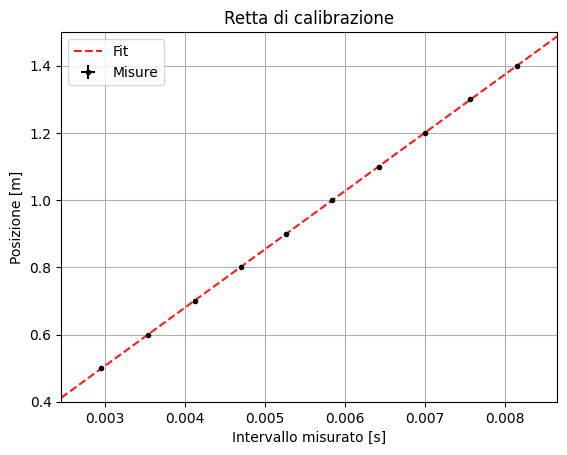

In [58]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_x_new = np.sqrt(sigma_x**2 + (m0*sigma_dT)**2)
# sigma_x_new = sigma_x
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(dT, x, sigma_x_new, "Intervallo misurato [s]", "Posizione [m]", "Retta di calibrazione", dT.min()-0.0005, dT.max()+0.0005, x.min()-0.1, x.max()+0.1, setrange=True, plot=True)

In [59]:
# STUDIO DEI RESIDUI
x_atteso = m*dT + c
d = x - x_atteso
d_norm = d / sigma_x_new

Text(0.5, 0, 'Intervallo misurato [s]')

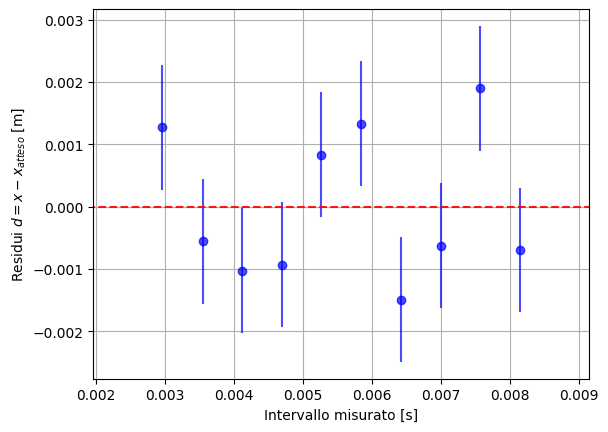

In [60]:
# RESIDUI
plt.grid()
plt.errorbar(dT, d, sigma_x_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([dT.min()-0.5, dT.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(dT.min()-0.001, dT.max()+0.001)
plt.ylabel("Residui $d=x-x_{atteso}$ [m]")
plt.xlabel("Intervallo misurato [s]")

Text(0.5, 0, 'Intervallo misurato [s]')

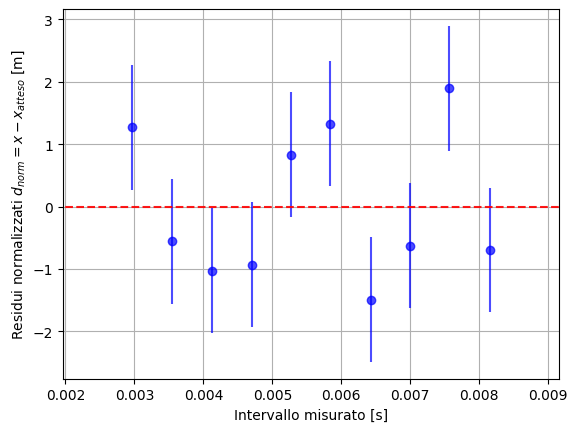

In [61]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(dT, d_norm, sigma_x_new/sigma_x_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([dT.min()-0.5, dT.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(dT.min()-0.001, dT.max()+0.001)
plt.ylabel("Residui normalizzati $d_{norm}=x-x_{atteso}$ [m]")
plt.xlabel("Intervallo misurato [s]")


In [62]:
# CALCOLO DI VS E COMPATIBILITÀ
vs = m*2
sigma_vs = sigma_m*2
vs_lab = 347.19
z_vs = (vs-vs_lab)/sigma_vs
print('Velocità del suono: ', vs)
print('Incertezza: ', sigma_vs)
print('Compatibilità: ', z_vs)

Velocità del suono:  347.4265637890367
Incertezza:  0.3830238830945103
Compatibilità:  0.617621509983885


0.0012767907173492975
m         =  173.7133
sigma(m)  =  0.2442
c         =  -0.0152
sigma(c)  =  0.0014
cov(m, c) =  -0.0003
rho(m, c) =  -0.9585


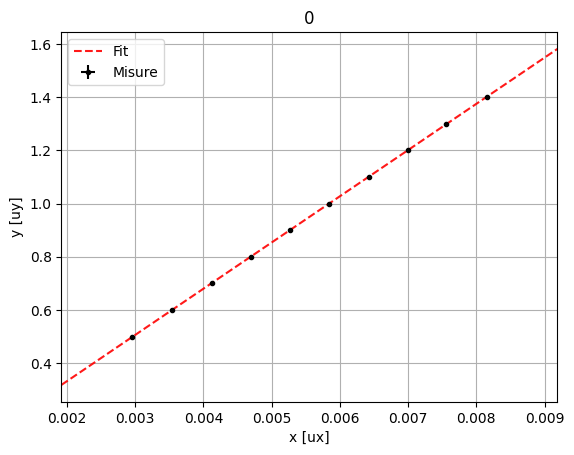

In [78]:
# Incertezze a posteriori
sigmy_post = math.sqrt( np.sum(d**2)/(d.size-2) )
uy_post = np.repeat(sigmy_post,x.size)
print (sigmy_post)

# Nuovo fit con incertezze a posteriori sulle y
m1, sm1, c1, sc1, cov1, rho1 = my.lin_fit(dT, x, uy_post, "x [ux]", "y [uy]", 0, 7, 0, 25, plot=True, setrange=False)